In [1]:
from PCM import cmeans
from FuzzySilhouette import find_best_cluster_count
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('arxiv_vectors.csv')
df.head()

,id,title,categories,processed_text,processed_categories,concat,vec
0,704.0033,Convergence of the discrete dipole approximati...,"['physics', 'optics']",convergence discrete dipole approximation i. t...,"physics, optics",convergence discrete dipole approximation i. t...,"[0.1269778460264206, 0.0676768496632576, -0.09..."
1,704.0038,The discrete dipole approximation: an overview...,"['physics', 'optics']",discrete dipole approximation overview recent ...,"physics, optics",discrete dipole approximation overview recent ...,"[0.14317379891872406, -0.04152209311723709, -0..."
2,704.0479,The affine part of the Picard scheme,"['math', 'AG']",affine picard scheme,"math, AG","affine picard scheme math, AG","[0.030805379152297974, -0.06239623948931694, -..."
3,704.1476,TeV-scale gravity in Horava-Witten theory on a...,['hep-th'],tev scale gravity horava witten theory compact...,hep-th,tev scale gravity horava witten theory compact...,"[-0.1107976958155632, 0.044458262622356415, -0..."
4,705.1155,State Vector Determination By A Single Trackin...,['astro-ph'],state vector determination single tracking sat...,astro-ph,state vector determination single tracking sat...,"[-0.1546483188867569, 0.19419126212596893, 0.0..."


In [3]:
def convert_to_array(vec):
    vec = vec.replace('[', '')
    vec = vec.replace(']', '')
    vec = vec.replace("'", '')
    vec = vec.split(', ')
    vec = [float(i) for i in vec]
    return np.array(vec)

In [4]:
from tqdm import tqdm

tqdm.pandas()
df['vec'] = df['vec'].progress_apply(convert_to_array)

100%|██████████| 100000/100000 [00:03<00:00, 26802.10it/s]


In [5]:
X = np.array(df.vec.values.tolist())

### Проверим для 3-х кластеров

In [7]:
centers, L = cmeans(X.T, 3, 2)

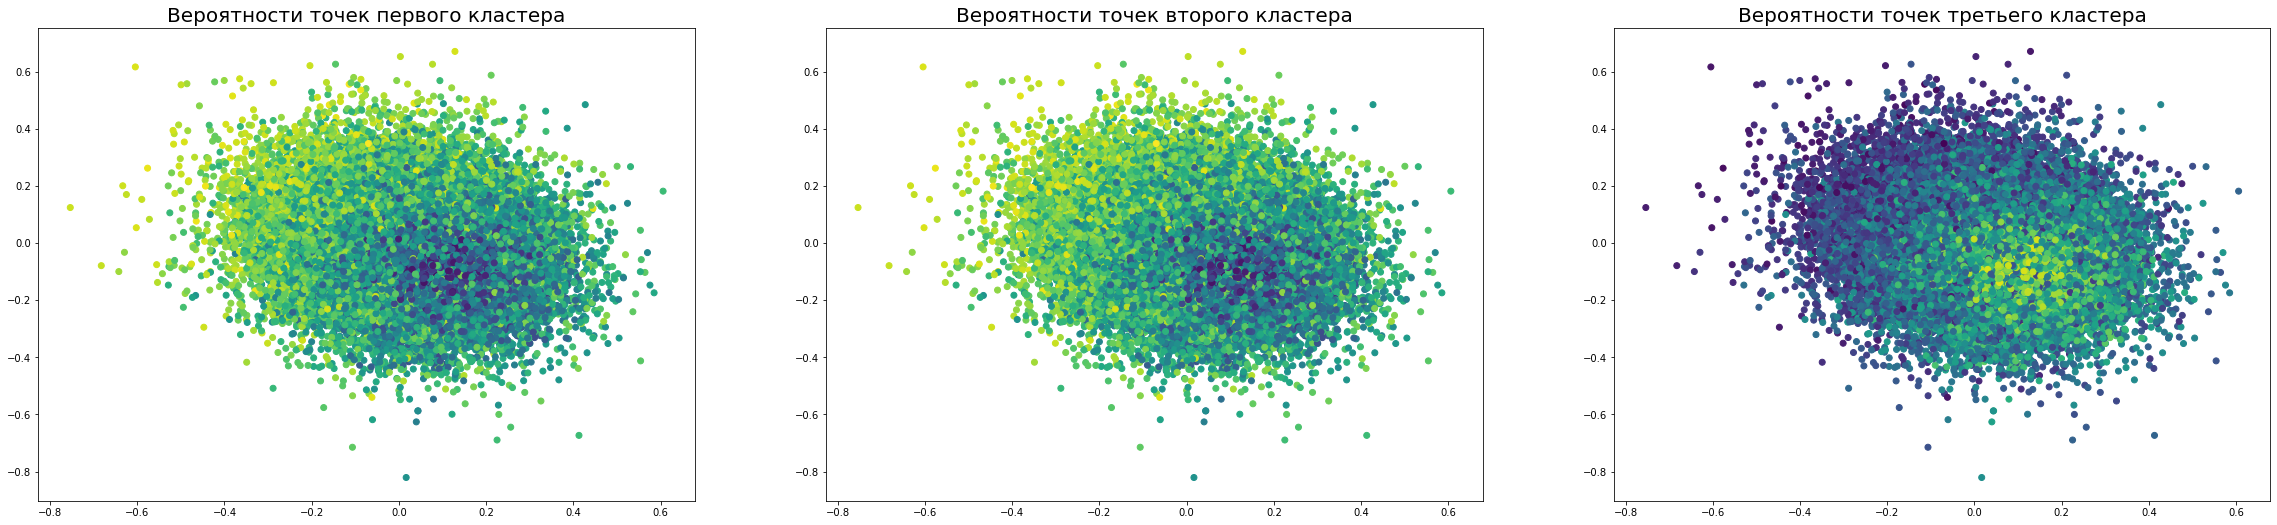

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
plt.subplot(431)
plt.gca().set_title('Вероятности точек первого кластера', fontsize = 20)
plt.scatter(X[:, 0], X[:, 1], c=L[0,:])
plt.subplot(432)
plt.gca().set_title('Вероятности точек второго кластера', fontsize = 20)
plt.scatter(X[:, 0], X[:, 1], c=L[1,:])
plt.subplot(433)
plt.gca().set_title('Вероятности точек третьего кластера', fontsize = 20)
plt.scatter(X[:, 0], X[:, 1], c=L[2,:])

### Подбираем оптимальное число кластеров

In [28]:
clusters_count, score, scores = find_best_cluster_count(X, 10, cmeams)

In [1]:
print('best count:', clusters_count)
print('best score:', score)

best count: 6
best score: 0.768127


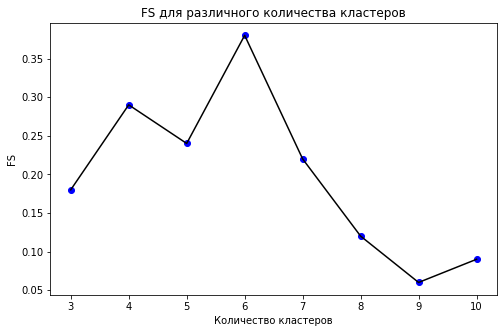

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(3, 11), scores, 'bo', np.arange(3, 11), scores, 'k')
plt.title('FS для различного количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('FS')
plt.show()

In [67]:
centers, L = cmeans(X.T, 6, 2)

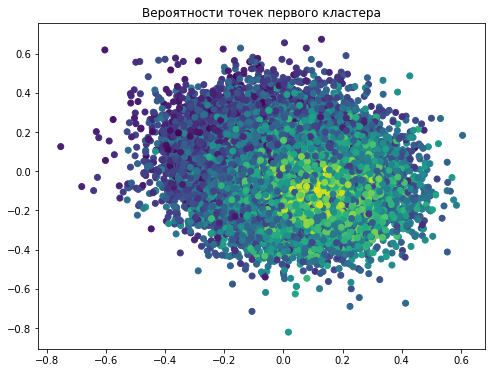

In [69]:
plt.figure(figsize=(8, 6))
plt.title('Вероятности точек первого кластера')
plt.scatter(X[:, 0], X[:, 1], c=L[0,:])